# 이미지 데이터 셋을 이용한 CNN Modeling

> ## Google Drive Mount

## Dogs and Cats Image_Data

* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow & Keras

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [6]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')
!nvidia-smi


GPU Information - /device:GPU:0 

Tue Mar 23 01:54:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [7]:
import keras

keras.__version__

'2.4.3'

# I. Google Drive Mount

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# 마운트 결과 확인
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# II. Data Preprocessing

> ## 1) Unzip 'dogs_and_cats_small.zip'


In [11]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip


Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [12]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 3) ImageDataGenerator() & flow_from_directory()

* Normalization
  * ImageDataGenerator()
* Resizing & Generator
  * flow_from_directory()

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 4) Test train_generator

In [17]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


# III. CNN Keras Modeling

> ## 1) Model Define

In [19]:
# Feature Extraction & Classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

> ## 2) Model Compile

In [21]:
# 모델 학습방법 설정
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

In [23]:
%%time
Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 42s 87ms/step - loss: 0.7009 - accuracy: 0.5150 - val_loss: 0.6775 - val_accuracy: 0.6000
Epoch 2/60
100/100 [==============================] - 9s 86ms/step - loss: 0.6803 - accuracy: 0.5732 - val_loss: 0.6702 - val_accuracy: 0.6290
Epoch 3/60
100/100 [==============================] - 9s 86ms/step - loss: 0.6440 - accuracy: 0.6419 - val_loss: 0.6534 - val_accuracy: 0.6140
Epoch 4/60
100/100 [==============================] - 9s 87ms/step - loss: 0.6037 - accuracy: 0.6520 - val_loss: 0.6460 - val_accuracy: 0.6170
Epoch 5/60
100/100 [==============================] - 9s 86ms/step - loss: 0.5372 - accuracy: 0.7293 - val_loss: 0.6382 - val_accuracy: 0.6820
Epoch 6/60
100/100 [==============================] - 9s 86ms/step - loss: 0.4802 - accuracy: 0.7630 - val_loss: 0.5635 - val_accuracy: 0.7180
Epoch 7/60
100/100 [==============================] - 9s 85ms/step - loss: 0.4317 - accuracy: 0.7924 - val_loss: 0.6577 - val_accuracy: 0.689

> ## 4) 학습 결과 시각화

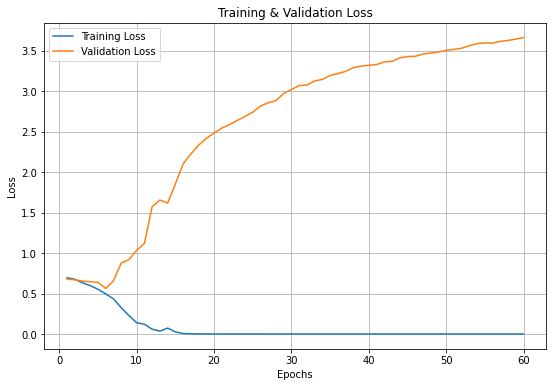

In [24]:
# Loss Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

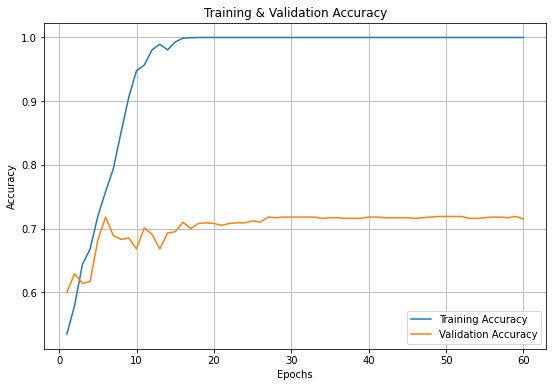

In [25]:
# Accuracy Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()


> ## 5) Model Evaluate

In [26]:
# test_generator
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [27]:
# Loss & Accuracy
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 52ms/step - loss: 3.5044 - accuracy: 0.6970
Loss = 3.50436
Accuracy = 0.69700


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [29]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34592 Mar 17 07:36 001_Model_iris.h5
-rw------- 1 root root 41498896 Mar 23 02:24 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [32]:
from keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 53ms/step - loss: 3.5044 - accuracy: 0.6970
Loss = 3.50436
Accuracy = 0.69700
